# Notebook d'analyse Are

## Partie 1  : Les groupes

In [1]:
import matplotlib.pyplot as plt

Code de l'algorithme des K-Means :

In [2]:
def k_means(points, k):
    import random
    from collections import defaultdict

    centroids = random.sample(points, k)
    
    clusters = defaultdict(list)
    
    while True:
        clusters.clear()
        
        for point in points:
            closest_centroid = min(centroids, key=lambda centroid: (point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2)
            clusters[closest_centroid].append(point)
        
        new_centroids = []
        for centroid, assigned_points in clusters.items():
            if assigned_points: 
                new_centroid = (sum(x for x, y in assigned_points) / len(assigned_points),
                                sum(y for x, y in assigned_points) / len(assigned_points))
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(centroid) 
        
        if new_centroids == centroids:
            break
        
        centroids = new_centroids
    
    point_to_cluster = {point: i for i, centroid in enumerate(centroids) for point in clusters[centroid]}
    
    return point_to_cluster

Ci dessous la fonction qui prend en entrée une liste de coordonnées ayant subi les k-means,et qui fusionne les groupes adjacents,pour connaitre le reel nombre de groupe :

In [3]:
def combine_group(coord_dict, threshold):
    from collections import defaultdict

    combined_groups = {}
    group_extremes = {}

    for coord, group_number in coord_dict.items():
        if isinstance(group_number, list):
            group_number = group_number[0]  

        if group_number not in combined_groups:
            combined_groups[group_number] = [coord]
            group_extremes[group_number] = [coord[0], coord[0], coord[1], coord[1]] 
        else:
            combined_groups[group_number].append(coord)
            group_extremes[group_number][0] = min(group_extremes[group_number][0], coord[0]) 
            group_extremes[group_number][1] = max(group_extremes[group_number][1], coord[0])
            group_extremes[group_number][2] = min(group_extremes[group_number][2], coord[1]) 
            group_extremes[group_number][3] = max(group_extremes[group_number][3], coord[1])  

    parent_map = {}  

    def find(group):
        
        if group not in parent_map:
            return group
        parent_map[group] = find(parent_map[group])  
        return parent_map[group]

    def union(group1, group2):
        root1 = find(group1)
        root2 = find(group2)
        if root1 != root2:
            parent_map[root2] = root1  
    group_keys = list(group_extremes.keys())

    for i in range(len(group_keys)):
        for j in range(i + 1, len(group_keys)):
            g1, g2 = group_keys[i], group_keys[j]
            ext1, ext2 = group_extremes[g1], group_extremes[g2]

            if (abs(ext1[1] - ext2[0]) <= threshold and abs(ext1[0] - ext2[1]) <= threshold) and \
               (abs(ext1[3] - ext2[2]) <= threshold and abs(ext1[2] - ext2[3]) <= threshold):
                union(g1, g2)

    merged_groups = defaultdict(list)

    for group, coords in combined_groups.items():
        root = find(group)
        merged_groups[root].extend(coords)

    return len(merged_groups) 

## Partie 2 : Oiseaux Proches selon les parametres 

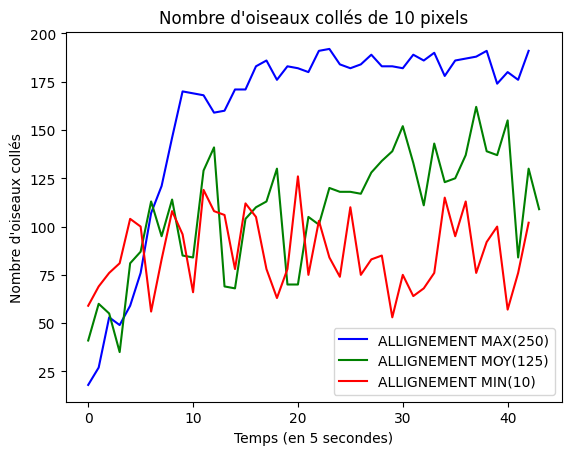

In [4]:
plt.plot([18, 27, 53, 49, 59, 76, 107, 121, 146, 170, 169, 168, 159, 160, 171, 171, 183, 186, 176, 183, 182, 180, 191, 192, 184, 182, 184, 189, 183, 183, 182, 189, 186, 190, 178, 186, 187, 188, 191, 174, 180, 176, 191],color='blue',label="ALLIGNEMENT MAX(250)")
plt.plot([41, 60, 55, 35, 81, 87, 113, 95, 114, 85, 84, 129, 141, 69, 68, 104, 110, 113, 130, 70, 70, 105, 101, 120, 118, 118, 117, 128, 134, 139, 152, 133, 111, 143, 123, 125, 137, 162, 139, 137, 155, 84, 130, 109],color='green',label="ALLIGNEMENT MOY(125)")
plt.plot([59, 69, 76, 81, 104, 100, 56, 83, 108, 96, 66, 119, 108, 106, 78, 112, 105, 78, 63, 78, 126, 75, 103, 84, 74, 110, 75, 83, 85, 53, 75, 64, 68, 76, 115, 95, 113, 76, 92, 100, 57, 76, 102],color='red',label="ALLIGNEMENT MIN(10)")
plt.legend()
plt.title("Nombre d'oiseaux collés de 10 pixels")
plt.xlabel("Temps (en 5 secondes)")
plt.ylabel("Nombre d'oiseaux collés")
plt.show()